In [1]:
import pandas as pd
df = pd.read_csv('/content/car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


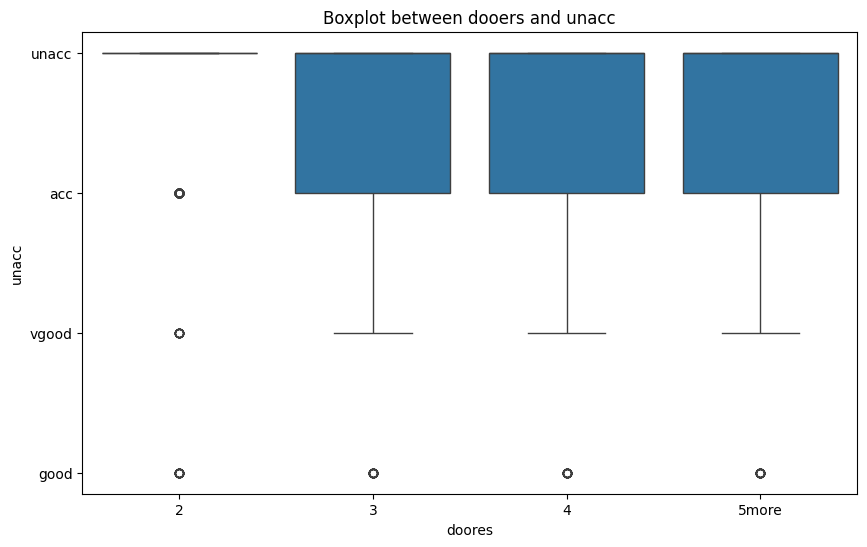

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='2', y='unacc', data=df)
plt.title('Boxplot between dooers and unacc')
plt.xlabel('doores')
plt.ylabel('unacc')
plt.show()

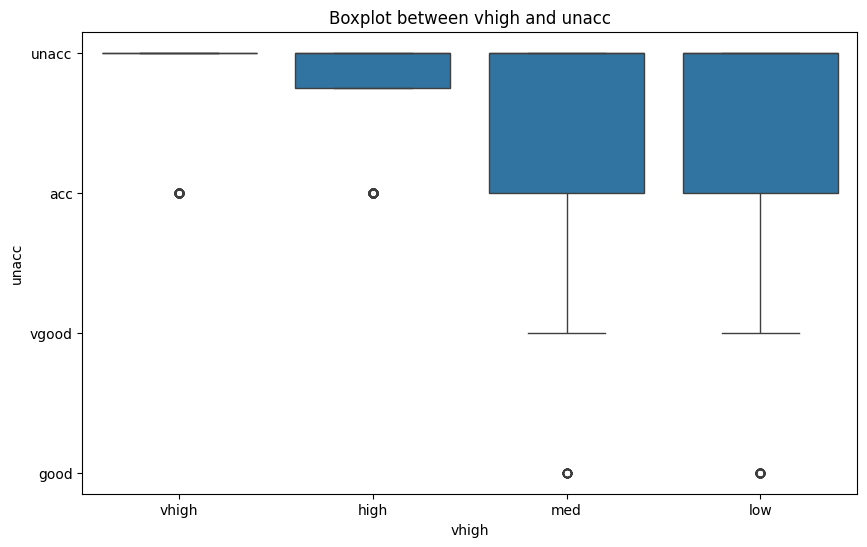

In [3]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='vhigh', y='unacc', data=df)
plt.title('Boxplot between vhigh and unacc')
plt.xlabel('vhigh')
plt.ylabel('unacc')
plt.show()

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


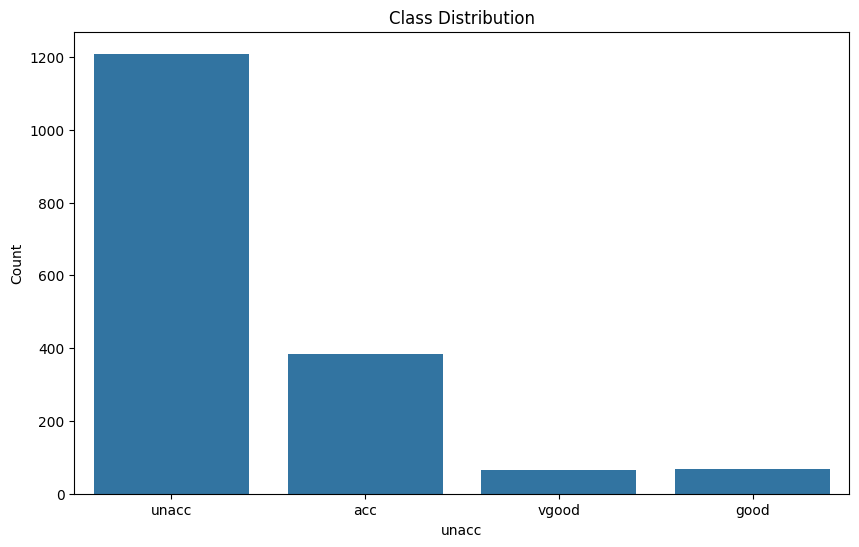

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='unacc', data=df)
plt.title('Class Distribution')
plt.xlabel('unacc')
plt.ylabel('Count')
plt.show()

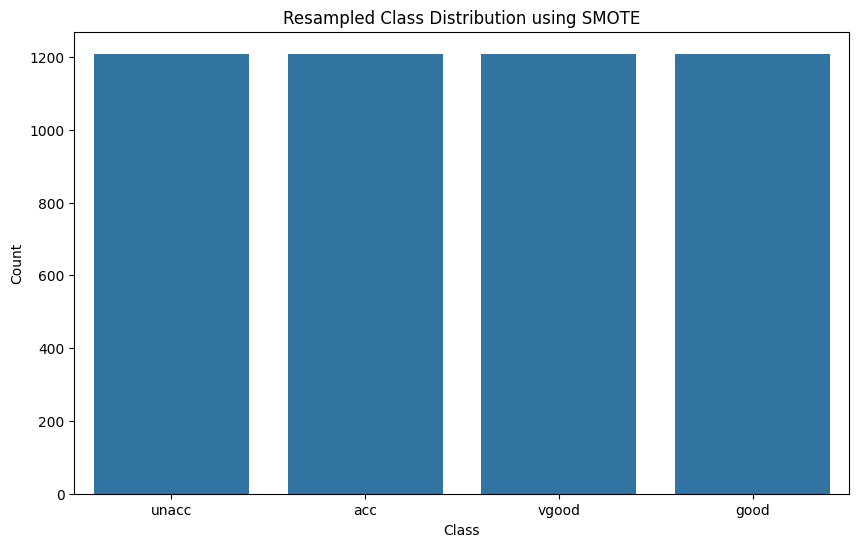

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
X = df.drop('unacc', axis=1)
y = df['unacc']

label_encoders = {}
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)


y_resampled = le_y.inverse_transform(y_resampled)




X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='unacc')
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='unacc', data=data_resampled)
plt.title('Resampled Class Distribution using SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()




In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_y.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)


print("Training Accuracy:", accuracy_train)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(30, 7))
plot_tree(clf, feature_names=X.columns, class_names=le_y.classes_, filled=True, rounded=True)
plt.title("Decision Tree for Car Evaluation Data Set")
plt.show()


Training Accuracy: 0.9994091580502216
Accuracy: 0.9903514817367333
Classification Report:
               precision    recall  f1-score   support

         acc       0.99      0.97      0.98       371
        good       0.99      1.00      1.00       344
       unacc       0.98      0.99      0.99       370
       vgood       0.99      1.00      1.00       366

    accuracy                           0.99      1451
   macro avg       0.99      0.99      0.99      1451
weighted avg       0.99      0.99      0.99      1451

Confusion Matrix:
 [[360   3   6   2]
 [  0 344   0   0]
 [  3   0 367   0]
 [  0   0   0 366]]


In [ ]:
df
